In [1]:
# torch_version = str(torch.__version__)
# scatter_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
# sparse_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
# !pip install torch-scatter -f $scatter_src
# !pip install torch-sparse -f $sparse_src
# !pip install torch-geometric
# !pip install ogb

In [2]:
# import torch
# import pandas as pd
# import networkx as nx
# import random
# import torch.nn.functional as F
# print(torch.__version__)

# # The PyG built-in GCNConv
# from torch_geometric.nn import GCNConv

# import torch_geometric.transforms as T

# from torch_geometric.data import DataLoader, Data, Dataset
# from tqdm.notebook import tqdm
# from ogb.graphproppred.mol_encoder import AtomEncoder
# from torch_geometric.nn import global_add_pool, global_mean_pool
# from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
# from torch.nn import BatchNorm1d
# from torch_geometric.nn import GCNConv
# import copy

In [3]:
# class AcyclicGraphDataset(Dataset):
#     def __init__(self, pyg_dataset):
#         super(AcyclicGraphDataset, self).__init__()
#         self.pyg_dataset = pyg_dataset

#     def len(self):
#         return len(self.pyg_dataset)

#     def get(self, idx):
#         return self.pyg_dataset[idx]

# class CyclicGraphDataset(Dataset):
#     def __init__(self, data_list):
#         super(CyclicGraphDataset, self).__init__()
#         self.data_list = data_list

#     def len(self):
#         return len(self.data_list)

#     def get(self, idx):
#         return self.data_list[idx]

# cyclic_dataset = torch.load("cyclic_dataset.pt")
# acyclic_dataset = torch.load("acyclic_dataset.pt")
# print('The {} dataset has {} graphs'.format("cyclic", len(cyclic_dataset)))
# print('The {} dataset has {} graphs'.format("acyclic", len(acyclic_dataset)))
# cyclic_data = cyclic_dataset[0]
# acyclic_data = acyclic_dataset[0]

In [4]:
# import random

# class IsAcyclic(Dataset):
#     def __init__(self, cyclic_data, acyclic_data):
#         super(IsAcyclic, self).__init__()
#         self.cyclic_data = cyclic_data
#         self.acyclic_data = acyclic_data
#         # Combine the two datasets
        
#         self.data_list = [(data, 0) for data in cyclic_data] + [(data, 1) for data in acyclic_data]

#     def len(self):
#         return len(self.data_list)

#     def get(self, idx):
#         data, label = self.data_list[idx]
#         # Ensure the label is a tensor and attach it to the data object
#         data.y = torch.tensor([label], dtype=torch.float)
#         return data

#     def get_idx_split(self, train_ratio=0.7, val_ratio=0.15):
#         def split_indices(data, train_ratio, val_ratio):
#             dataset_size = len(data)
#             indices = list(range(dataset_size))
#             random.shuffle(indices)

#             train_split = int(train_ratio * dataset_size)
#             val_split = int(val_ratio * dataset_size) + train_split

#             return indices[:train_split], indices[train_split:val_split], indices[val_split:]

#         # Split cyclic and acyclic datasets separately
#         cyclic_train, cyclic_val, cyclic_test = split_indices(self.cyclic_data, train_ratio, val_ratio)
#         acyclic_train, acyclic_val, acyclic_test = split_indices(self.acyclic_data, train_ratio, val_ratio)

#         # Offset acyclic indices by the size of cyclic dataset
#         offset = len(self.cyclic_data)
#         acyclic_train = [i + offset for i in acyclic_train]
#         acyclic_val = [i + offset for i in acyclic_val]
#         acyclic_test = [i + offset for i in acyclic_test]

#         # Combine the splits from cyclic and acyclic datasets
#         train_indices = cyclic_train + acyclic_train
#         val_indices = cyclic_val + acyclic_val
#         test_indices = cyclic_test + acyclic_test

#         # Shuffle combined splits to mix cyclic and acyclic graphs
#         random.shuffle(train_indices)
#         random.shuffle(val_indices)
#         random.shuffle(test_indices)

#         return {
#             'train': train_indices,
#             'valid': val_indices,
#             'test': test_indices
#         }


# # Assuming 'cyclic_dataset' and 'acyclic_dataset' are already created as per your provided code
# dataset = IsAcyclic(cyclic_dataset, acyclic_dataset)

# torch.save(dataset, 'is_acyclic.pt')

In [5]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print('Device: {}'.format(device))

In [6]:
# split_idx = dataset.get_idx_split()

# train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
# valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
# test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

In [7]:
# args = {
#     'device': device,
#     'input_dim' : 1,
#     'gcn_output_dim' : [8, 16],
#     'dropout': 0.5,
#     'lr': 0.01,
#     'weight_decay' : 0.00001,
#     'epochs': 30,
# }

In [8]:
# we use the node degrees as the initial features for all nodes.
# Then we apply two layers of GCNs with output dimensions
# equal to 8, 16 respectively and perform global averaging to obtain
# the graph representations. Finally, we employ one fully-connected
# layer as the classifier.

In [9]:
# class GCN(torch.nn.Module):
#     def __init__(self, input_dim, gcn_output_dims, dropout, return_embeds=False):
#         super(GCN, self).__init__()

#         # A list of GCNConv layers
#         self.convs = None

#         # A list of 1D batch normalization layers
#         self.bns = None

#         # The log softmax layer
#         self.softmax = None

#         self.convs = torch.nn.ModuleList([GCNConv(in_channels=input_dim, out_channels=gcn_output_dims[0])])
#         self.convs.extend([GCNConv(in_channels=gcn_output_dims[i + 0], out_channels=gcn_output_dims[i + 1]) for i in range(len(gcn_output_dims) - 1)])

#         self.bns = torch.nn.ModuleList([BatchNorm1d(num_features=gcn_output_dims[l]) for l in range(len(gcn_output_dims) - 1)])
        
#         self.softmax = torch.nn.LogSoftmax()

#         # Probability of an element getting zeroed
#         self.dropout = dropout

#         # Skip classification layer and return node embeddings
#         self.return_embeds = return_embeds

#     def reset_parameters(self):
#         for conv in self.convs:
#             conv.reset_parameters()
#         for bn in self.bns:
#             bn.reset_parameters()

#     def forward(self, x, adj_t):
#         out = None

#         for i in range(len(self.convs)-1):
#           x = F.relu(self.bns[i](self.convs[i](x, adj_t)))
#           if self.training:
#             x = F.dropout(x, p=self.dropout)
#         x = self.convs[-1](x, adj_t)
#         if self.return_embeds:
#           out = x
#         else:
#           out = self.softmax(x)

#         return out

# ### GCN to predict graph property
# class GCN_Graph(torch.nn.Module):
#     def __init__(self, input_dim, gcn_output_dims, output_dim, dropout):
#         super(GCN_Graph, self).__init__()

#         # self.node_encoder = AtomEncoder(hidden_dim)
        
#         self.gnn_node = GCN(input_dim, gcn_output_dims, dropout, return_embeds=True)

#         self.pool = global_mean_pool # global averaging to obtain graph representation

#         # Output layer
#         self.linear = torch.nn.Linear(gcn_output_dims[-1], output_dim) # One fully connected layer as a classifier


#     def reset_parameters(self):
#       self.gnn_node.reset_parameters()
#       self.linear.reset_parameters()

#     def forward(self, batched_data):
#         # Extract important attributes of our mini-batch
#         x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        
#         device = edge_index.device
#         degrees = torch.sum(edge_index[0] == torch.arange(edge_index.max() + 1, device=device)[:, None], dim=1, dtype=torch.float)
#         x = degrees.unsqueeze(1)  # Add feature dimension
#         embed = x.to(device)  # Ensure the embedding tensor is on the correct device

#         out = None

#         node_embeddings = self.gnn_node(embed, edge_index)
#         agg_features = self.pool(node_embeddings, batch)
#         out = self.linear(agg_features)

#         return out

# def train(model, device, data_loader, optimizer, loss_fn):
#     model.train()
#     loss = 0

#     for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
#       batch = batch.to(device)

#       if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
#           pass
#       else:
#         ## ignore nan targets (unlabeled) when computing training loss.
#         is_labeled = batch.y == batch.y

#         optimizer.zero_grad()
#         out = model(batch)
#         filtered_output = out[is_labeled]

#         # Reshape the labels to match the output shape
#         filtered_labels = batch.y[is_labeled].unsqueeze(1).type(torch.float32)

#         loss = loss_fn(filtered_output, filtered_labels)

#         loss.backward()
#         optimizer.step()

#     return loss.item()

# def compute_accuracy(y_true, y_pred):
#     # Assuming y_pred are logits; apply sigmoid and round off to get binary predictions
#     preds = torch.sigmoid(y_pred) > 0.5
#     correct = preds.eq(y_true.view_as(preds)).sum()
#     accuracy = correct.float() / y_true.numel()
#     return accuracy.item()

# def eval(model, device, loader):
#     model.eval()
#     total_accuracy = 0
#     total_samples = 0

#     for batch in loader:
#         batch = batch.to(device)
#         with torch.no_grad():
#             pred = model(batch)

#         # Assuming binary classification and batch.y is your ground truth
#         accuracy = compute_accuracy(batch.y, pred)
#         total_accuracy += accuracy * batch.y.size(0)
#         total_samples += batch.y.size(0)

#     return total_accuracy / total_samples

# model = GCN_Graph(args['input_dim'], args['gcn_output_dim'],
#             output_dim=1, dropout=args['dropout']).to(device)
# # evaluator = Evaluator(name='ogbg-molhiv')

# model.reset_parameters()

# optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
# loss_fn = torch.nn.BCEWithLogitsLoss()

# best_model = None
# best_valid_acc = 0

# # Training loop remains the same...

# # Evaluation in your main loop
# for epoch in range(1, 1 + args["epochs"]):
#     print('Training...')
#     train_loss = train(model, device, train_loader, optimizer, loss_fn)

#     print('Evaluating...')
#     train_acc = eval(model, device, train_loader)
#     val_acc = eval(model, device, valid_loader)
#     test_acc = eval(model, device, test_loader)

#     if val_acc > best_valid_acc:
#         best_valid_acc = val_acc
#         best_model = copy.deepcopy(model)

#     print(f'Epoch: {epoch:02d}, '
#           f'Loss: {train_loss:.4f}, '
#           f'Train Acc: {100 * train_acc:.2f}%, '
#           f'Valid Acc: {100 * val_acc:.2f}% '
#           f'Test Acc: {100 * test_acc:.2f}%')

# # Evaluate the best model
# best_train_acc = eval(best_model, device, train_loader)
# best_val_acc = eval(best_model, device, valid_loader)
# best_test_acc = eval(best_model, device, test_loader)

# print(f'Best model: '
#       f'Train: {100 * best_train_acc:.2f}%, '
#       f'Valid: {100 * best_val_acc:.2f}% '
#       f'Test: {100 * best_test_acc:.2f}%')


2.1.1


Device: cpu


In [24]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, dropout, return_embeds=False):
        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        self.convs = torch.nn.ModuleList([GCNConv(in_channels = input_dim, out_channels = 32),
                                          GCNConv(in_channels = 32,        out_channels = 48),
                                          GCNConv(in_channels = 48,        out_channels = 64)])

        # self.bns = torch.nn.ModuleList([BatchNorm1d(num_features = gcn_output_dims[l]) for l in range(len(gcn_output_dims) - 1)])
        
        self.softmax = torch.nn.LogSoftmax()

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, x, adj_t):
        out = None

        for i in range(len(self.convs)):
            x = self.convs[i](x, adj_t)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        if self.return_embeds:
          out = x
        else:
          out = self.softmax(x)

        return out

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, input_dim, output_dim, dropout, emb = False):
        super(GCN_Graph, self).__init__()

        self.emb = emb
        self.gnn_node = GCN(input_dim, dropout, return_embeds=True)

        self.pool = global_mean_pool # global averaging to obtain graph representation
        
        self.post_mp = torch.nn.Sequential(torch.nn.Linear(64, 32),
                                           torch.nn.Dropout(dropout),
                                           torch.nn.Linear(32, output_dim))

    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.post_mp.apply(reset_parameters)

    def forward(self, batched_data):
        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = x.to(device)  # Ensure the embedding tensor is on the correct device

        out = None

        node_embeddings = self.gnn_node(embed, edge_index)
        x = self.pool(node_embeddings, batch)
        x = self.post_mp(x)
        if self.emb == True:
            return x    
        return F.log_softmax(x, dim=1)

2.1.1
Device: cpu
500


/Users/simonbele/miniconda3/envs/research/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Training:   0%|          | 0/500 [00:00<?, ?Epoch/s]

Maximum test set accuracy: 0.34210526315789475
Minimum loss: 0.6931471824645996



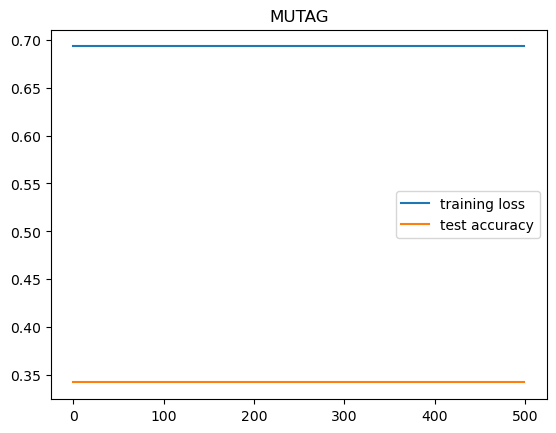

In [72]:
import torch
import pandas as pd
import networkx as nx
import random
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T

from torch_geometric.data import DataLoader, Data, Dataset
from tqdm.notebook import tqdm
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch.nn import BatchNorm1d
from torch_geometric.nn import GCNConv

from torch_geometric.datasets import TUDataset
from torch.utils.data import random_split
import copy


import time

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
from tqdm import trange
import pandas as pd
import copy

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.nn as pyg_nn

import matplotlib.pyplot as plt

from torch_geometric.data import DataLoader
import torch
import copy
from tqdm.auto import trange

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

def reset_parameters(module):
    if isinstance(module, torch.nn.Linear):
        module.reset_parameters()
        
class GCN(torch.nn.Module):
    def __init__(self, input_dim, dropout, return_embeds=False):
        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        self.convs = torch.nn.ModuleList([GCNConv(in_channels = input_dim, out_channels = 32),
                                          GCNConv(in_channels = 32,        out_channels = 48),
                                          GCNConv(in_channels = 48,        out_channels = 64)])

        # self.bns = torch.nn.ModuleList([BatchNorm1d(num_features = gcn_output_dims[l]) for l in range(len(gcn_output_dims) - 1)])
        
        self.softmax = torch.nn.LogSoftmax()

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, x, adj_t):
        out = None

        for i in range(len(self.convs)):
            x = self.convs[i](x, adj_t)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        if self.return_embeds:
          out = x
        else:
          out = self.softmax(x)

        return out

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, input_dim, output_dim, dropout, emb = False):
        super(GCN_Graph, self).__init__()

        self.emb = emb
        self.gnn_node = GCN(input_dim, dropout, return_embeds=True)

        self.pool = global_mean_pool # global averaging to obtain graph representation
        
        self.post_mp = torch.nn.Sequential(torch.nn.Linear(64, 32),
                                           torch.nn.Dropout(dropout),
                                           torch.nn.Linear(32, output_dim))

    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.post_mp.apply(reset_parameters)

    def forward(self, batched_data):
        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = x.to(device)  # Ensure the embedding tensor is on the correct device

        out = None

        node_embeddings = self.gnn_node(embed, edge_index)
        x = self.pool(node_embeddings, batch)
        x = self.post_mp(x)
        if self.emb == True:
            return x    
        return F.log_softmax(x, dim=1)

def build_optimizer(args, params):
    weight_decay = args.weight_decay
    filter_fn = filter(lambda p : p.requires_grad, params)
    if args.opt == 'adam':
        optimizer = optim.Adam(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'sgd':
        optimizer = optim.SGD(filter_fn, lr=args.lr, momentum=0.95, weight_decay=weight_decay)
    elif args.opt == 'rmsprop':
        optimizer = optim.RMSprop(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'adagrad':
        optimizer = optim.Adagrad(filter_fn, lr=args.lr, weight_decay=weight_decay)
    if args.opt_scheduler == 'none':
        return None, optimizer
    elif args.opt_scheduler == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=args.opt_decay_step, gamma=args.opt_decay_rate)
    elif args.opt_scheduler == 'cos':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=args.opt_restart)
    return scheduler, optimizer

def train(dataset, args, train_indices, val_indices, test_indices):
    # Split dataset into training, validation, and testing
    train_dataset = [dataset[i] for i in train_indices]
    val_dataset = [dataset[i] for i in val_indices]
    test_dataset = [dataset[i] for i in test_indices]

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)

    # Model initialization
    model = GCN_Graph(args.input_dim, output_dim=1, dropout=args.dropout).to(device)
    loss_fn = torch.nn.BCEWithLogitsLoss()
    
    opt = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)

    # Training loop
    losses = []
    test_accs = []
    val_accs = 0
    best_acc = 0
    best_model = None
    print(args.epochs)
    for epoch in trange(args.epochs, desc="Training", unit="Epoch"):
        model.train()
        total_loss = 0
        for batch in train_loader:
            opt.zero_grad()
            pred = model(batch)
            # Reshape output to match target labels
            pred = pred.squeeze()
            label = batch.y.float()
            loss = loss_fn(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(train_loader.dataset)
        losses.append(total_loss)

        # Test accuracy
        if epoch % 10 == 0:
          test_acc = test(test_loader, model)
          test_accs.append(test_acc)
          if test_acc > best_acc:
            best_acc = test_acc
            best_model = copy.deepcopy(model)
        else:
          test_accs.append(test_accs[-1])
          
    return test_accs, val_accs, losses, best_model, best_acc, test_loader

def test(loader, model):
    model.eval()
    correct = 0
    total = 0
    for data in loader:
        with torch.no_grad():
            pred = model(data).max(dim=1)[1]
            label = data.y
        correct += pred.eq(label).sum().item()
        total += data.num_graphs

    return correct / total

class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

args = {'batch_size': 32, 
        'dropout': 0.5, 
        'epochs': 500, 
        'input_dim' : 7,
        'opt': 'adam', 
        'opt_scheduler': 'none', 
        'opt_restart': 0, 
        'weight_decay': 5e-3, 
        'lr': 0.01}

args = objectview(args)

dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG')
num_graphs = len(dataset)

# Define split percentages
train_percentage = 0.8
val_percentage = 0.0

# Calculate split sizes
train_size = int(num_graphs * train_percentage)
val_size = int(num_graphs * val_percentage)
test_size = num_graphs - train_size - val_size

# Create shuffled indices
indices = np.random.permutation(num_graphs)
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

test_accs, val_accs, losses, best_model, best_acc, test_loader = train(dataset, args, train_indices, val_indices, test_indices)

print("Maximum test set accuracy: {0}".format(max(test_accs)))
print("Minimum loss: {0}".format(min(losses)))

# Run test for our best model to save the predictions!
test(test_loader, best_model)
print()

plt.title(dataset.name)
plt.plot(losses, label="training loss")
plt.plot(test_accs, label="test accuracy")
plt.legend()
plt.show()